#### Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
train_data = pd.read_csv('train.csv')

In [43]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Missing Data Analysis - Data Cleaning

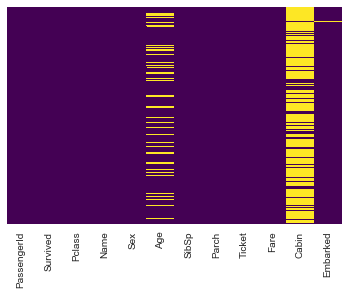

In [44]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

From the above heatmap, we can see that we have missing data in Age and cabin, There is so much missing data for the cabin column so its better to drop that column now, For age, we can impute the data later and proceed.

In [45]:
train_data.drop('Cabin',inplace=True,axis=1)

In [46]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


##### Let's visualize the data to get a better understanding

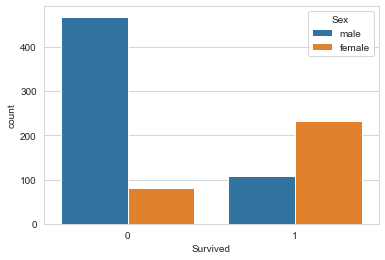

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data,hue='Sex')

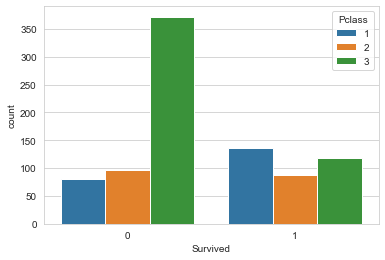

In [48]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

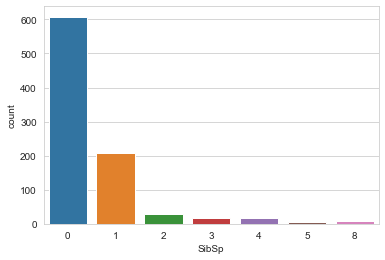

In [49]:
sns.countplot(x='SibSp',data=train_data)

#### Dealing with Missing Data

Age data has some missing values, We will fill the data by calculating average age of each passenger class.

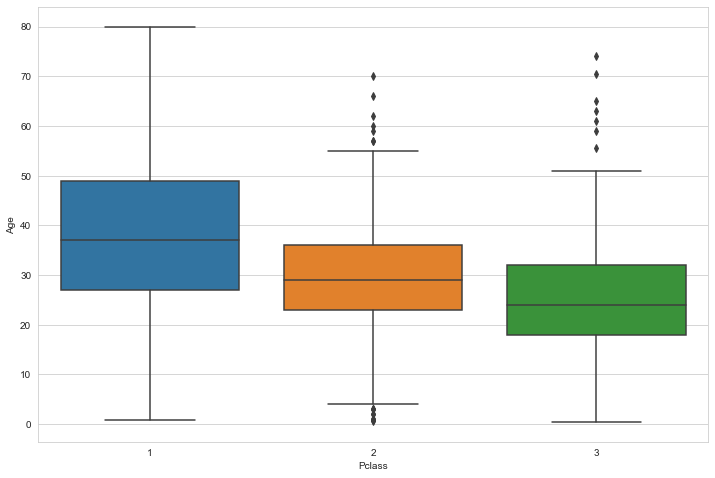

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train_data)

Function to fill in missing age values

In [51]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [52]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)

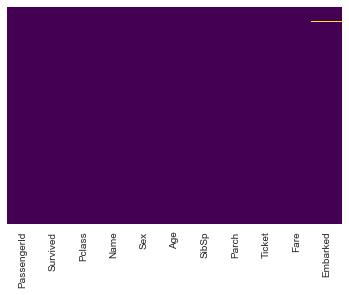

In [53]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

### Converting Categorical Feature

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Name and Ticket doesn't have any impact on survival, so we will drop the columns.

In [55]:
train_data.drop(['Name','Ticket'],inplace=True,axis=1)

In [56]:
train_data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


Let's convert categorical features to dummy variables using pandas

In [57]:
gender=pd.get_dummies(train_data['Sex'],drop_first=True)


In [58]:
embark=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [59]:
train_data=pd.concat([train_data,gender,embark],axis=1)

In [60]:
train_data.drop(['Sex','Embarked'],inplace=True,axis=1)

In [61]:
train_data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


### Implementing Logistic Regression model on our data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(train_data.drop('Survived',axis=1),train_data['Survived'],test_size=0.3,random_state=101)

### Training and Predicting

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel =LogisticRegression(solver='liblinear')

In [66]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions=logmodel.predict(X_test)

### Evaluation 

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



##### The End!